<h3><strong>Chocolate Data Sales</strong></h3>
 I chose chocolate sales data because I wanted to analyze something familiar and fun.
 chocolate is sold everywhere and loved by many, so it is important to see how different regions respond to different products 
<h2><strong>Key matrics</strong></h2>
<ul>
    <li>Sales trend over Time(Best sales month )</li>
    <li>Total Sales by Country with Best-Selling Product</li>
    <li>Amount Sales by Products </li>
    <li>Total Boxes Shipped by Country</li>
    <li>Top 5 SalesPerson </li>
</ul>

In [65]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv("Chocolate Sales.csv")
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,4-Jan-22,5320,180
1,Van Tuxwell,India,85% Dark Bars,1-Aug-22,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,7-Jul-22,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,4410,323
1090,Jehu Rudeforth,USA,White Choc,7-Jun-22,6559,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,2086,384


In [50]:
df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4    Amount        1094 non-null   int64         
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 51.4+ KB


In [38]:
#convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\mezia\AppData\Local\Temp\ipykernel_20844\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [57]:
df.columns = df.columns.str.strip()
df.columns.tolist()


['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped']

In [40]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1089    False
1090    False
1091    False
1092    False
1093    False
Length: 1094, dtype: bool

In [41]:
# there is no missing value
df.isna().sum()

Sales Person     0
Country          0
Product          0
Date             0
 Amount          0
Boxes Shipped    0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
394    False
395    False
396    False
397    False
398    False
Length: 399, dtype: bool

In [8]:
df.duplicated().sum()

np.int64(0)

<h3><stron>line chart :Sales trend over Time</strong></h3>
 <li>which month recorded the highest chocolate sale?</li>

In [76]:
# extract the month from date
df['date_month'] = df['Date'].dt.month

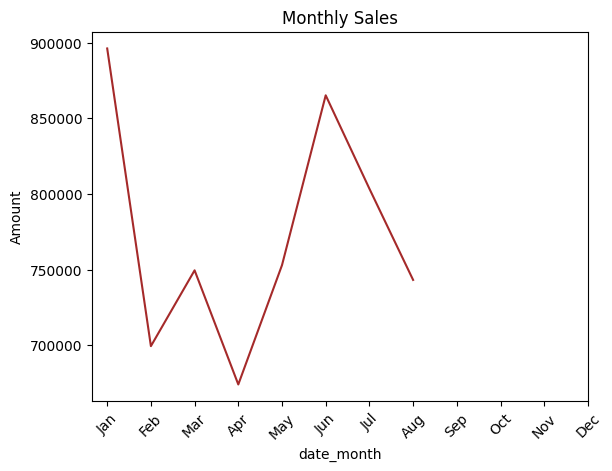

In [165]:
# calculate sales by month by grouping sales amount by month
sale_by_month = df.groupby ("date_month")["Amount"].sum().reset_index()
sns.lineplot(data =sale_by_month   , x="date_month", y ="Amount", color="brown")
plt.xticks(rotation=45)
plt.title ("Monthly Sales")
plt.xticks(ticks=range(1,13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

The line chart showing that <strong>January</strong> has the highest sales amount, these refer to too many reasons:
<ul>
    <li>January clearance sales after the December holiday sales </li>
     <li>Customer take advantage of new year deals to restock or buy more at reduced prices</li>
    <li>Early Valentine's Day Shopping</li>
    
</ul>

<h3><strong>Bar chart :Total Sales by Country with Best-Selling Product</strong></h3>
<ul>
    <li>Which countries generated the most sales revenue?</li>
    <li>What is the best-selling product in each country?</li>
   <li> Do different countries prefer different products, or is one product globally dominant?</li>
</ul>

In [136]:
#group both country and product by total amount 
country_product_sales = df.groupby(['Country', 'Product'])['Amount'].sum().reset_index()
print(country_product_sales)


       Country              Product  Amount
0    Australia       50% Dark Bites   89222
1    Australia       70% Dark Bites   39354
2    Australia        85% Dark Bars   38479
3    Australia      99% Dark & Pure   54908
4    Australia          After Nines   27769
..         ...                  ...     ...
127        USA  Peanut Butter Cubes   33628
128        USA      Raspberry Choco   83524
129        USA   Smooth Sliky Salty   45493
130        USA  Spicy Special Slims   25214
131        USA           White Choc   67221

[132 rows x 3 columns]


In [137]:
# calculate the best selling product per country 
best_sellers = country_product_sales.sort_values('Amount', ascending=False).drop_duplicates('Country')
print(best_sellers)

         Country              Product  Amount
0      Australia       50% Dark Bites   89222
80   New Zealand      Mint Chip Choco   86709
128          USA      Raspberry Choco   83524
105           UK  Peanut Butter Cubes   79695
54         India              Eclairs   79009
41        Canada   Smooth Sliky Salty   68257


C:\Users\mezia\AppData\Local\Temp\ipykernel_20844\3686432536.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




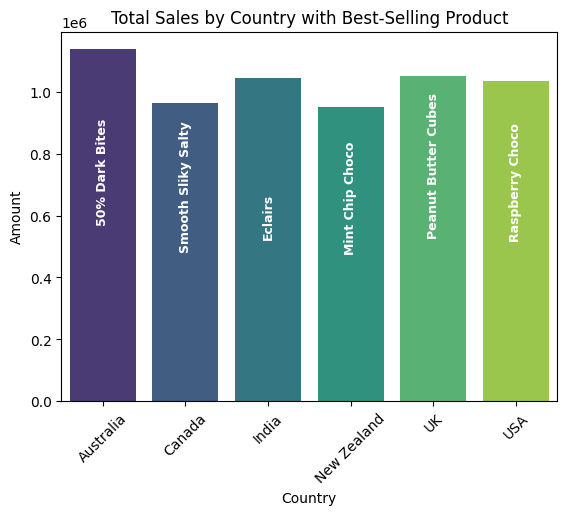

In [215]:
#total sale per country 
Amount_by_cont = df.groupby("Country")["Amount"].sum().reset_index()
# merge both the amount per country with best selling product 
amount_with_bestseller = Amount_by_cont.merge(best_sellers[['Country', 'Product']], on='Country')
sns.barplot(data =Amount_by_cont   , x="Country", y ="Amount", palette="viridis")
# showing the best selling product inside each bar 
for i, row in amount_with_bestseller.iterrows():
    plt.text(i, row["Amount"] * 0.5, row["Product"], ha='center', va='bottom',color="white", fontsize=9,
             fontweight='bold',
             rotation=90)
plt.xlabel('Country')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.title ("Total Sales by Country with Best-Selling Product")
plt.show()


we analyzed the total sales generated per country and The chart below displays <strong>the Total Sales by Country with Best-Selling Products</strong>, with each bar labeled internally by the country's top-selling product. This gives a quick, at-a-glance understanding of not only which regions generate the most revenue, but also which specific products are driving that success in each market.
<ul>
    <li><strong>Australia </strong>has the highest amount of sales</ul></ln> </li>
    <li><strong>Best selling products</strong></li>
    <ol>
        <li>Australia : 50% Dark Bites</li>
        <li>Canada: Smooth Silkysalty</li>
        <li>India: Eclairs</li>
        <li>New zeland: Mint Chip Choco</li>
        <li>Uk: Peanut Butter Cubes</li>
        <li>USA: Rasberry Choco</li>
    </ol>

</ul>

<h3><strong>Sales Amount by Products</strong></h3>
<li> What is the sales amount for each product? </li>

C:\Users\mezia\AppData\Local\Temp\ipykernel_20844\198717474.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




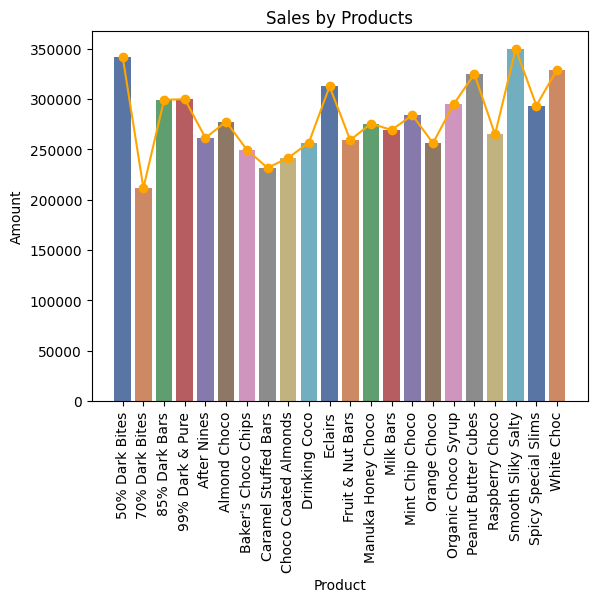

In [193]:
Amount_by_pro = df.groupby("Product")["Amount"].sum().reset_index()

ax = sns.barplot(data = Amount_by_pro , x="Product", y ="Amount",palette='deep')
# add line chart 
x= range(len(Amount_by_pro))
y= Amount_by_pro["Amount"]
plt.plot(x, y, color='orange', marker='o', label='Trend Line')
plt.xticks(rotation=90)

plt.title ("Sales by Products")
plt.show()


The chart below shows the total sales amounts for each product name. This visualization helps in understanding which products are contributing the most to the overall sales.
<li><strong>Smooth silky salty</strong>leads in sales with amount of $349692</li>

<h3><strong>Donut chart: Total boxes Shipped by Country </strong></h3>
<ul>
    <li> Which countries have the highest shipping volume, and why?</li>
    <li>Are we over-shipping to low-revenue countries? </li>
</ul>

In [110]:
box_shipped_by_country = df.groupby("Country")["Boxes Shipped"].sum().reset_index()
print(box_shipped_by_country)

       Country  Boxes Shipped
0    Australia          32647
1       Canada          31221
2        India          29470
3  New Zealand          26580
4           UK          30265
5          USA          26824


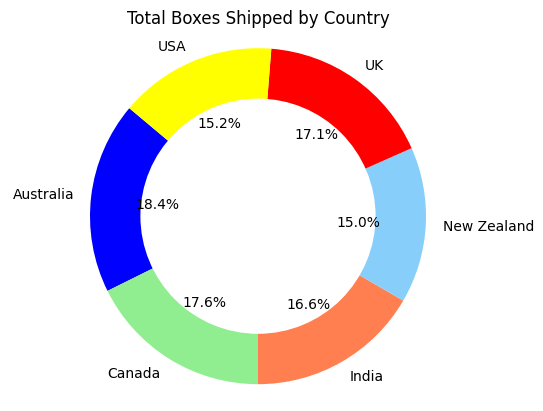

In [212]:
labels = box_shipped_by_country["Country"]
sizes = box_shipped_by_country["Boxes Shipped"]
colors = ['blue', 'lightgreen', 'coral', 'lightskyblue','red','yellow'] 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.title('Total Boxes Shipped by Country')
plt.show()

"This chart displays <strong>the total number of boxes shipped to each country</strong> over the selected period. It helps us understand where our distribution volume is highest and which markets have the most logistical demand."
As we can see, Australia is the leader in total boxes shipped, with <strong>18.4% </strong>, indicating high demand and consistent order volumes.

<h3><strong> Top 5 Salespersons by sales</strong></h3>


C:\Users\mezia\AppData\Local\Temp\ipykernel_20844\3398983973.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




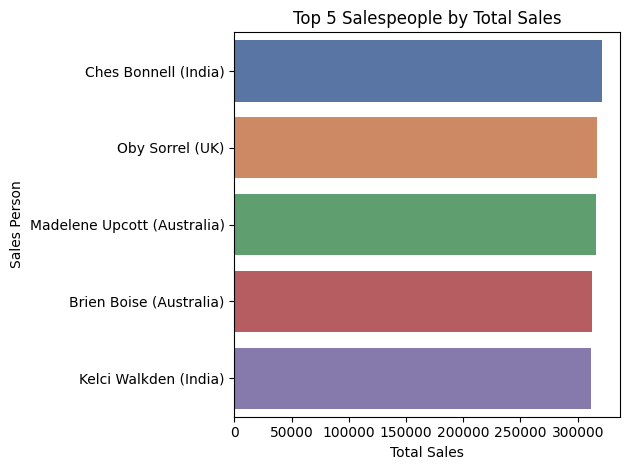

In [211]:
# Salesperson Performance
# group the data by each salesperson and focus on the countru column for each sales person 
country_info = df.groupby('Sales Person')['Country'].agg(lambda x: x.mode().iloc[0]).reset_index()
top_salespeople = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(5).reset_index()
top_salespeople = top_salespeople.merge(country_info, on='Sales Person')
top_salespeople['Sales Person'] = top_salespeople['Sales Person'] + ' (' + top_salespeople['Country'] + ')'

sns.barplot(data=top_salespeople, x='Amount', y='Sales Person', palette='deep')
plt.title('Top 5 Salespeople by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sales Person')
plt.tight_layout()
plt.show()

the bar chart below displays <strong> The 5 top salespersons </strong> ranked by their<strong> total sales amount </strong>, including the <strong>country name</strong> where the salesperson is located. 
we can clearly see that :
<li><strong>Ches bonell</strong> leads with the highest sales and showcases strong sales in India. </li>


<h3><strong>chocolate sales Analysis report </strong></h3>
The Analysis of Chocolate Sales gives us a clear picture of how sales are doing in different countries.
<strong>Australia</strong> stands out as the country with the most sales and the most boxes shipped, mostly thanks to its best-selling product, <strong>50% Dark Bites</strong>, making up <strong>18.4%</strong>of all shipments. Other countries have their 
own favorite products, like <strong>Smooth Silkysalty in Canada </strong> and <strong> Eclairs in India </strong>.
When we look at sales over time, <strong>January</strong> had the highest sales, likely because of holiday deals, people shopping for Valentine’s Day early, and New Year promotions. We also looked at the top 5 salespeople, and <strong>Ches Bonell</strong> had the highest sales, doing especially well in <strong>India</strong>. Overall, this helps us understand where our products are selling best, which items are most popular, and which people are driving those sales—so we can make smart choices in planning and growing the business.



<h4><strong>Recommendations:</strong></h4>
 <li> Since Australia leads in both sales and shipments, continue investing in marketing, and inventory for this region especially for the best-selling products,50% Dark Bites.</li>
 <li>Products like Smooth Silkysalty (Canada) and Eclairs (India) are performing well locally. Test these best-sellers in similar or neighboring markets to expand their success.</li>
 <li>With January being the strongest month, plan major campaigns, discounts, and restocking efforts around this time to maximize revenue.</li>
 <li>Ensure supply chain efficiency in top regions (like Australia and India) by optimizing delivery schedules, warehouse stock levels, and shipment planning.</li>
 